In [3]:
library(dplyr)
library(tidyr)
library(ggsci)
library(lfe)
library(stringr)
library(ggplot2)

In [15]:
df <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

In [16]:
df %>% 
    filter(origin_cluster != destination_cluster) %>%
    mutate(oRain  = as.numeric(oPRCP > 0),
           dRain  = as.numeric(dPRCP > 0),
           nearby = as.numeric(dist < 100)) -> df

In [17]:
df %>%
    group_by(dyad) %>%
    mutate_at(vars(op1, op2, op3, dp1, dp2, dp3),
              .funs = list(l1 = function(x) lag(x),
                           l2 = function(x) lag(x, 2),
                           l3 = function(x) lag(x, 3),
                           l4 = function(x) lag(x, 4),
                           l5 = function(x) lag(x, 5),
                           m1 = function(x) lead(x),
                           m2 = function(x) lead(x, 2),
                           m3 = function(x) lead(x, 3),
                           m4 = function(x) lead(x, 4),
                           m5 = function(x) lead(x, 5))) -> df
                           
df %>%
    fill(matches("m[0-9]"), .direction = 'down') %>%
    fill(matches("l[0-9]"), .direction = 'up') -> df

In [21]:
cns <- colnames(df)
rhs <- str_c(cns[str_detect(cns, '[od]p[123]_[ml][0-9]')], collapse = ' + ')

In [13]:
fit1 <- felm(log(ndotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3 
             | dyad + date | 0 | origin_cluster + destination_cluster, df)
fit2 <- felm(log(pdotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)


In [38]:
df$op1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [39]:
fit1 <- felm(as.formula(str_c('log(ndotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3 + ', rhs, 
             ' | dyad + date | 0 | origin_cluster + destination_cluster')), df)
fit2 <- felm(as.formula(str_c('log(ndotd) ~ op1 + op2 + op3 + dp1 + dp2 + dp3 + ', rhs, 
             ' | dyad + date | 0 | origin_cluster + destination_cluster')), df, weights = df$n)

Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


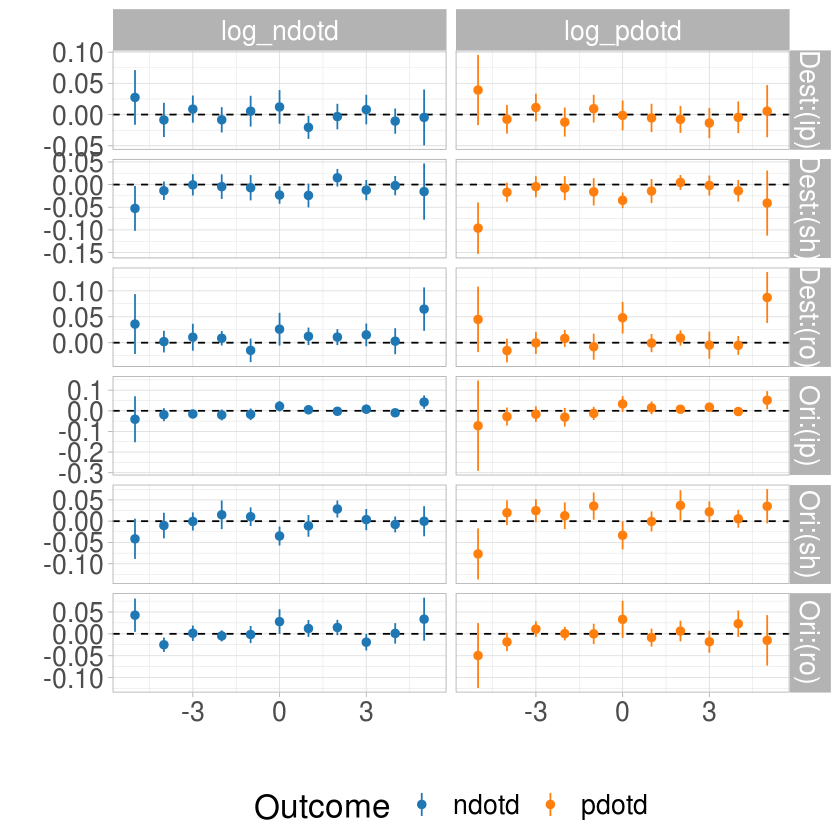

In [48]:
vns <- c('dp1'   = "Dest:(ip)",
         'dp2'   = "Dest:(sh)",
         'dp3'   = "Dest:(ro)",
         'op1'   = 'Ori:(ip)',
         'op2'   = 'Ori:(sh)',
         'op3'   = 'Ori:(ro)',
         'pdotd' = 'log_pdotd', 
         'ndotd' = 'log_ndotd')

as.data.frame(summary(fit1)$coef) %>%
     mutate(var  = rownames(.),
            dv   = 'ndotd') %>%
    bind_rows(as.data.frame(summary(fit2)$coef) %>%
              mutate(var  = rownames(.),
                     dv   = 'pdotd')) %>%
    mutate(ll  = ifelse(str_detect(var, '_l[0-9]'), as.numeric(str_sub(var, -1, -1)), 
                        ifelse(str_detect(var, '_m[0-9]'), -1 * as.numeric(str_sub(var, -1, -1)), 0)),
           var = str_replace(var, '_[lm][0-9]', '')) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    ggplot(aes(x = ll, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(var~dv, scales = 'free_y', labeller = as_labeller(vns)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p

p
ggsave('/home/mfzhao/SI_plots/rc2b_ll_dyad.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)

In [37]:
as.data.frame(summary(fit1)$coef) %>%
     mutate(var  = rownames(.),
            dv   = 'ndotd') %>%
    bind_rows(as.data.frame(summary(fit2)$coef) %>%
              mutate(var  = rownames(.),
                     dv   = 'pdotd')) %>%
    mutate(ll  = ifelse(str_detect(var, '_l[0-9]'), as.numeric(str_sub(var, -1, -1)), 
                        ifelse(str_detect(var, '_m[0-9]'), -1 * as.numeric(str_sub(var, -1, -1)), 0))) %>%
    filter(str_detect(var, '[od]p[123]$'))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”


Estimate,Cluster s.e.,t value,Pr(>|t|),var,dv,ll
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>


In [35]:
options(repr.plot.width=15, repr.plot.height=10)
temp %>%
    mutate(od = ifelse(str_detect(var, 'op'), 'origin policy', 'destination policy'),
           od = factor(od, c('origin policy', 'destination policy')),
           var = ifelse(str_detect(var, 'p1'), 'ip', 
                        ifelse(str_detect(var, 'p2'), 'sh', 'ro')),
           var = factor(var, levels = c('ip', 'sh', 'ro'))) %>%
    ggplot(aes(x = var, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    xlab('') + 
    ylab('') +
    scale_color_d3() + 
    facet_grid(dv ~ od, scales = 'free_x') +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p

ggsave('/home/mfzhao/p3.pdf', p, device = 'pdf', width = 6.5, height = 5, scale = 2)

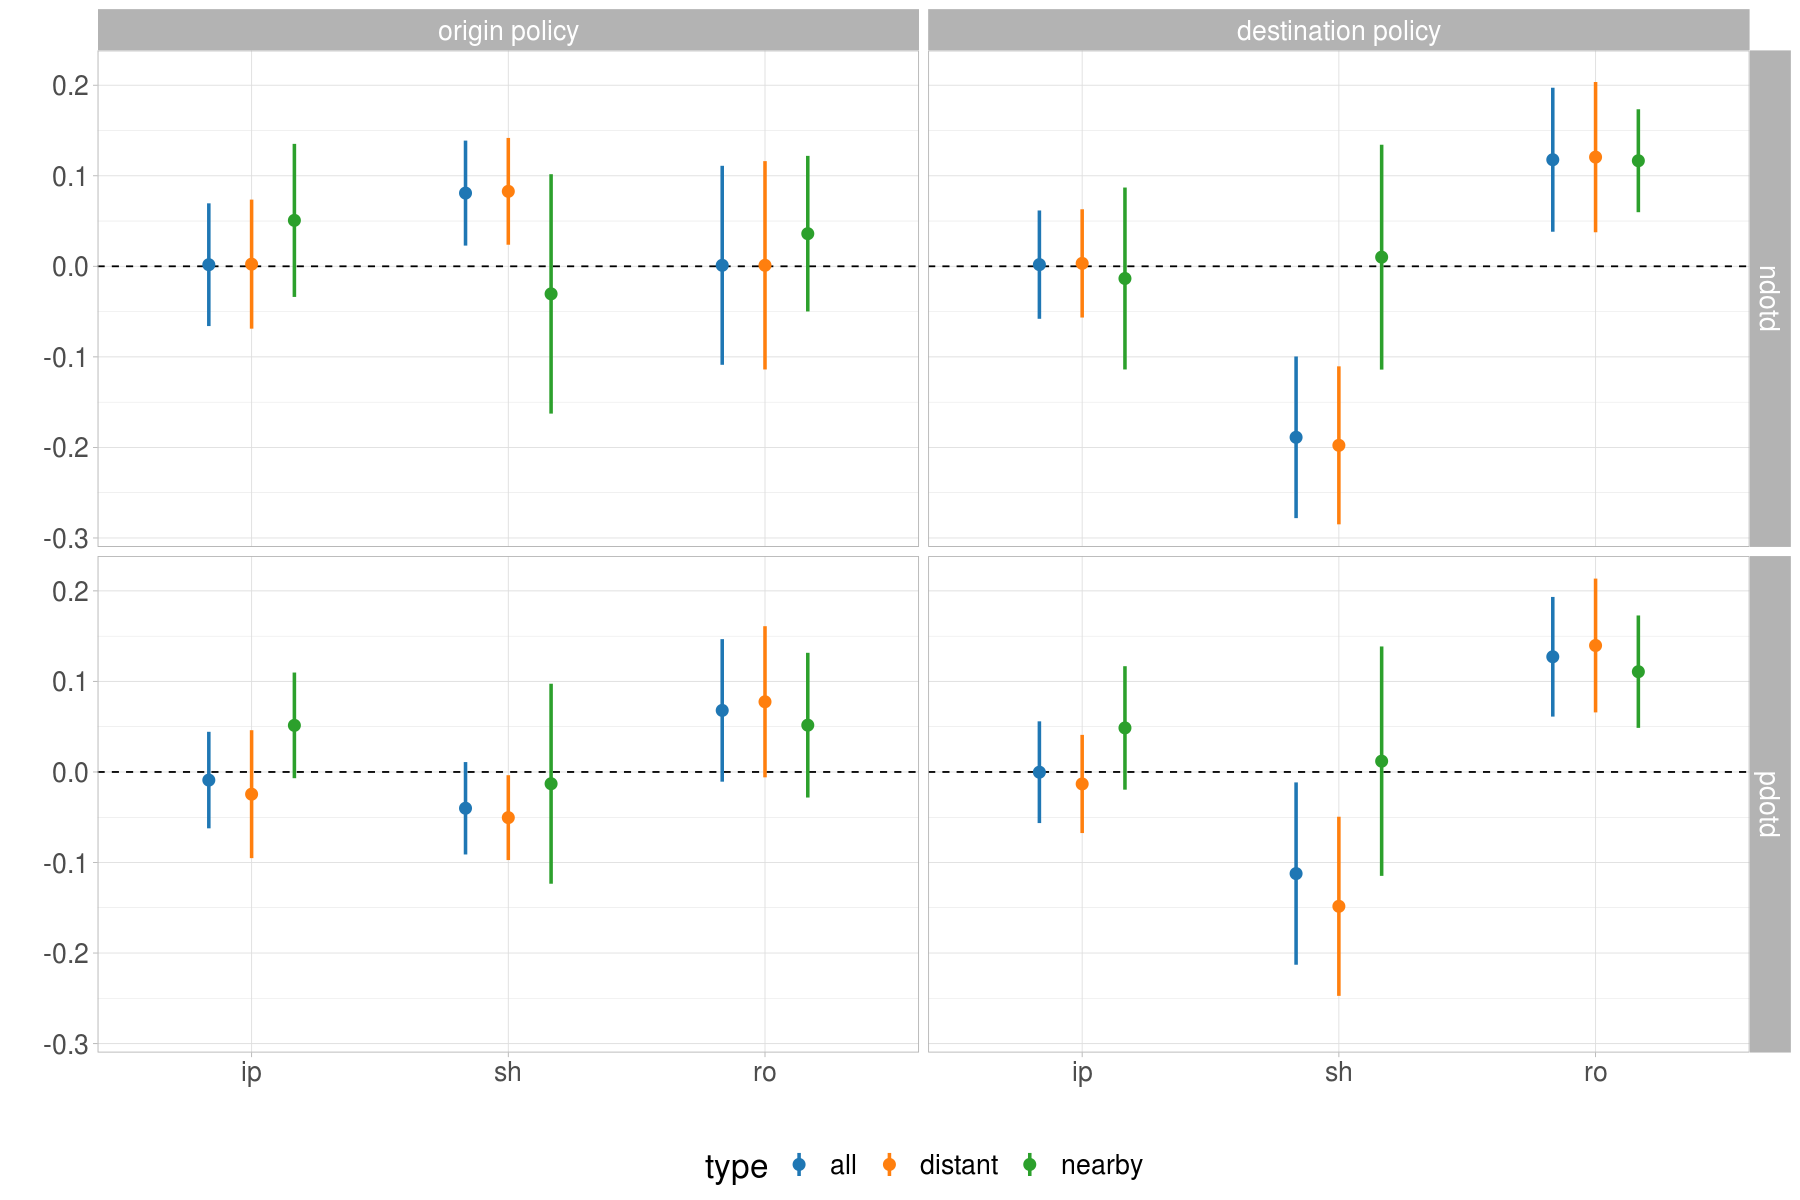

In [36]:
p

In [190]:
temp %>% 
    mutate(impact = (exp(estimate) - 1) * 100) %>%
    filter(type == 'all')

estimate,se,t value,Pr(>|t|),var,dv,type,impact
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
-0.011670421,0.02691602,-0.4335865,0.6664537538,op1,pdotd,all,-1.1602586
-0.025887447,0.02405473,-1.0761895,0.2870080123,op2,pdotd,all,-2.5555240
0.063412985,0.03608703,1.7572236,0.0850014653,op3,pdotd,all,6.5466771
0.004135980,0.02636809,0.1568555,0.8759904286,dp1,pdotd,all,0.4144545
-0.087670940,0.04695092,-1.8672890,0.0677290109,dp2,pdotd,all,-8.3937734
0.128580546,0.03061631,4.1997401,0.0001097737,dp3,pdotd,all,13.7213016
0.007376517,0.02768334,0.2664605,0.7909804155,op1,ndotd,all,0.7403791
0.062750248,0.04339900,1.4458916,0.1544470644,op2,ndotd,all,6.4760879
-0.017855673,0.05162324,-0.3458844,0.7308807653,op3,ndotd,all,-1.7697205


In [37]:
df.op_mex %>%
    mutate(o   = ifelse(op3 == 1, 'p3', 
                     ifelse(op2 == 1, 'p2', 
                        ifelse(op1 == 1, 'p1', 'p0'))),
           dp0 = 1) -> df.op_mex

In [38]:
df.op_mex %>%
    select(date, dyad, origin_cluster, destination_cluster, n, nearby, bordering, dist, 
           ndotd, pdotd, oRain, dRain, oTMAX, dTMAX) %>%
    bind_cols(as.data.frame(model.matrix(ndotd ~ 0 + o * (dp0 + dp1 + dp2 + dp3), df.op_mex))) -> df.opex

In [39]:
df.opex %>%
    mutate(`op0:dp0` = op0 * dp0,
           `op0:dp1` = op0 * dp1,
           `op0:dp2` = op0 * dp2,
           `op0:dp3` = op0 * dp3) -> df.opex

colnames(df.opex) <- str_replace(colnames(df.opex), ':', '_')

In [40]:
fit7 <- felm(log(ndotd) ~ 
                          op1 + op2 + op3 +
                          op0_dp1 + op0_dp2 + op0_dp3 +
                          op1_dp1 + op1_dp2 + op1_dp3 +
                          op2_dp1 + op2_dp2 + op2_dp3 +
                          op3_dp1 + op3_dp2 + op3_dp3 
             | dyad + date | 0 | origin_cluster + destination_cluster, df.opex)

fit8 <- felm(log(pdotd) ~ 
                          op1 + op2 + op3 +
                          op0_dp1 + op0_dp2 + op0_dp3 +
                          op1_dp1 + op1_dp2 + op1_dp3 +
                          op2_dp1 + op2_dp2 + op2_dp3 +
                          op3_dp1 + op3_dp2 + op3_dp3 
             | dyad + date | 0 | origin_cluster + destination_cluster, df.opex, weights = df.opex$n)


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


In [41]:
df.opex %>%
    filter(op3_dp1 == 1 & op3_dp2 == 0) %>%
    select(dyad) %>%
    distinct()

dyad
<chr>
40001->05007
40001->05143
40021->05007
40021->05143
40027->05007
40027->05119
40027->05131
40027->05143
40041->05007


In [42]:
df.opex  %>%
    mutate_at(vars(matches('[od]p[0123]')), 
              .funs = list(c  = function(x) x * .$nearby, 
                           nc = function(x) x * (1 - .$nearby))) -> df.opex2
colnames(df.opex2)

[1] "date"                "dyad"                "origin_cluster"     
 [4] "destination_cluster" "n"                   "nearby"             
 [7] "bordering"           "dist"                "ndotd"              
[10] "pdotd"               "oRain"               "dRain"              
[13] "oTMAX"               "dTMAX"               "op0"                
[16] "op1"                 "op2"                 "op3"                
[19] "dp0"                 "dp1"                 "dp2"                
[22] "dp3"                 "op1_dp0"             "op2_dp0"            
[25] "op3_dp0"             "op1_dp1"             "op2_dp1"            
[28] "op3_dp1"             "op1_dp2"             "op2_dp2"            
[31] "op3_dp2"             "op1_dp3"             "op2_dp3"            
[34] "op3_dp3"             "op0_dp0"             "op0_dp1"            
[37] "op0_dp2"             "op0_dp3"             "op0_c"              
[40] "op1_c"               "op2_c"               "op3_c"              
[43] "dp0_c"               "dp1_c"               "dp2_c"              
[46] "dp3_c"               "op1_dp0_c"           "op2_dp0_c"          
[49] "op3_dp0_c"           "op1_dp1_c"           "op2_dp1_c"          
[52] "op3_dp1_c"           "op1_dp2_c"           "op2_dp2_c"          
[55] "op3_dp2_c"           "op1_dp3_c"           "op2_dp3_c"          
[58] "op3_dp3_c"           "op0_dp0_c"           "op0_dp1_c"          
[61] "op0_dp2_c"           "op0_dp3_c"           "op0_nc"             
[64] "op1_nc"              "op2_nc"              "op3_nc"             
[67] "dp0_nc"              "dp1_nc"              "dp2_nc"             
[70] "dp3_nc"              "op1_dp0_nc"          "op2_dp0_nc"         
[73] "op3_dp0_nc"          "op1_dp1_nc"          "op2_dp1_nc"         
[76] "op3_dp1_nc"          "op1_dp2_nc"          "op2_dp2_nc"         
[79] "op3_dp2_nc"          "op1_dp3_nc"          "op2_dp3_nc"         
[82] "op3_dp3_nc"          "op0_dp0_nc"          "op0_dp1_nc"         
[85] "op0_dp2_nc"          "op0_dp3_nc"

In [43]:
fit9 <- felm(log(ndotd) ~ 
                          op1_c + op2_c + op3_c +
                          op0_dp1_c + op0_dp2_c + op0_dp3_c +
                          op1_dp1_c + op1_dp2_c + op1_dp3_c +
                          op2_dp1_c + op2_dp2_c + op2_dp3_c +
                          op3_dp1_c + op3_dp2_c + op3_dp3_c +
                          op1_nc + op2_nc + op3_nc +
                          op0_dp1_nc + op0_dp2_nc + op0_dp3_nc +
                          op1_dp1_nc + op1_dp2_nc + op1_dp3_nc +
                          op2_dp1_nc + op2_dp2_nc + op2_dp3_nc +
                          op3_dp1_nc + op3_dp2_nc + op3_dp3_nc 
             | dyad + date | 0 | origin_cluster + destination_cluster, df.opex2)

fit10 <- felm(log(pdotd) ~ 
                          op1_c + op2_c + op3_c +
                          op0_dp1_c + op0_dp2_c + op0_dp3_c +
                          op1_dp1_c + op1_dp2_c + op1_dp3_c +
                          op2_dp1_c + op2_dp2_c + op2_dp3_c +
                          op3_dp1_c + op3_dp2_c + op3_dp3_c +
                          op1_nc + op2_nc + op3_nc +
                          op0_dp1_nc + op0_dp2_nc + op0_dp3_nc +
                          op1_dp1_nc + op1_dp2_nc + op1_dp3_nc +
                          op2_dp1_nc + op2_dp2_nc + op2_dp3_nc +
                          op3_dp1_nc + op3_dp2_nc + op3_dp3_nc  
             | dyad + date | 0 | origin_cluster + destination_cluster, df.opex2, weights = df.opex2$n)


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


In [44]:
df %>%
    mutate(o = ifelse(op3 == 1, 'op3', 
                     ifelse(op2 == 1, 'op2',
                           ifelse(op1 == 1, 'op1', 'op0'))),
           d = ifelse(dp3 == 1, 'dp3', 
                     ifelse(dp2 == 1, 'dp2',
                           ifelse(dp1 == 1, 'dp1', 'dp0')))) %>%
    group_by(o, d, nearby) %>%
    tally() -> ics

ics %>%
    ungroup() %>%
    rename(type = nearby) %>%
    mutate(type = ifelse(type, 'nearby', 'distant')) %>%
    bind_rows(df %>%
              mutate(o = ifelse(op3 == 1, 'op3', 
                     ifelse(op2 == 1, 'op2',
                           ifelse(op1 == 1, 'op1', 'op0'))),
                     d = ifelse(dp3 == 1, 'dp3', 
                     ifelse(dp2 == 1, 'dp2',
                           ifelse(dp1 == 1, 'dp1', 'dp0'))),
                    type = 'all') %>%
              group_by(o, d, type) %>%
              tally()) %>%
    rename(`origin policy` = o, `destination policy` = d) -> ics

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 15 rows [1, 2, 14, 15, 16, 27, 28, 29, 40, 41, 42, 53, 54, 66, 67].”
Joining, by = c("origin policy", "destination policy", "type")



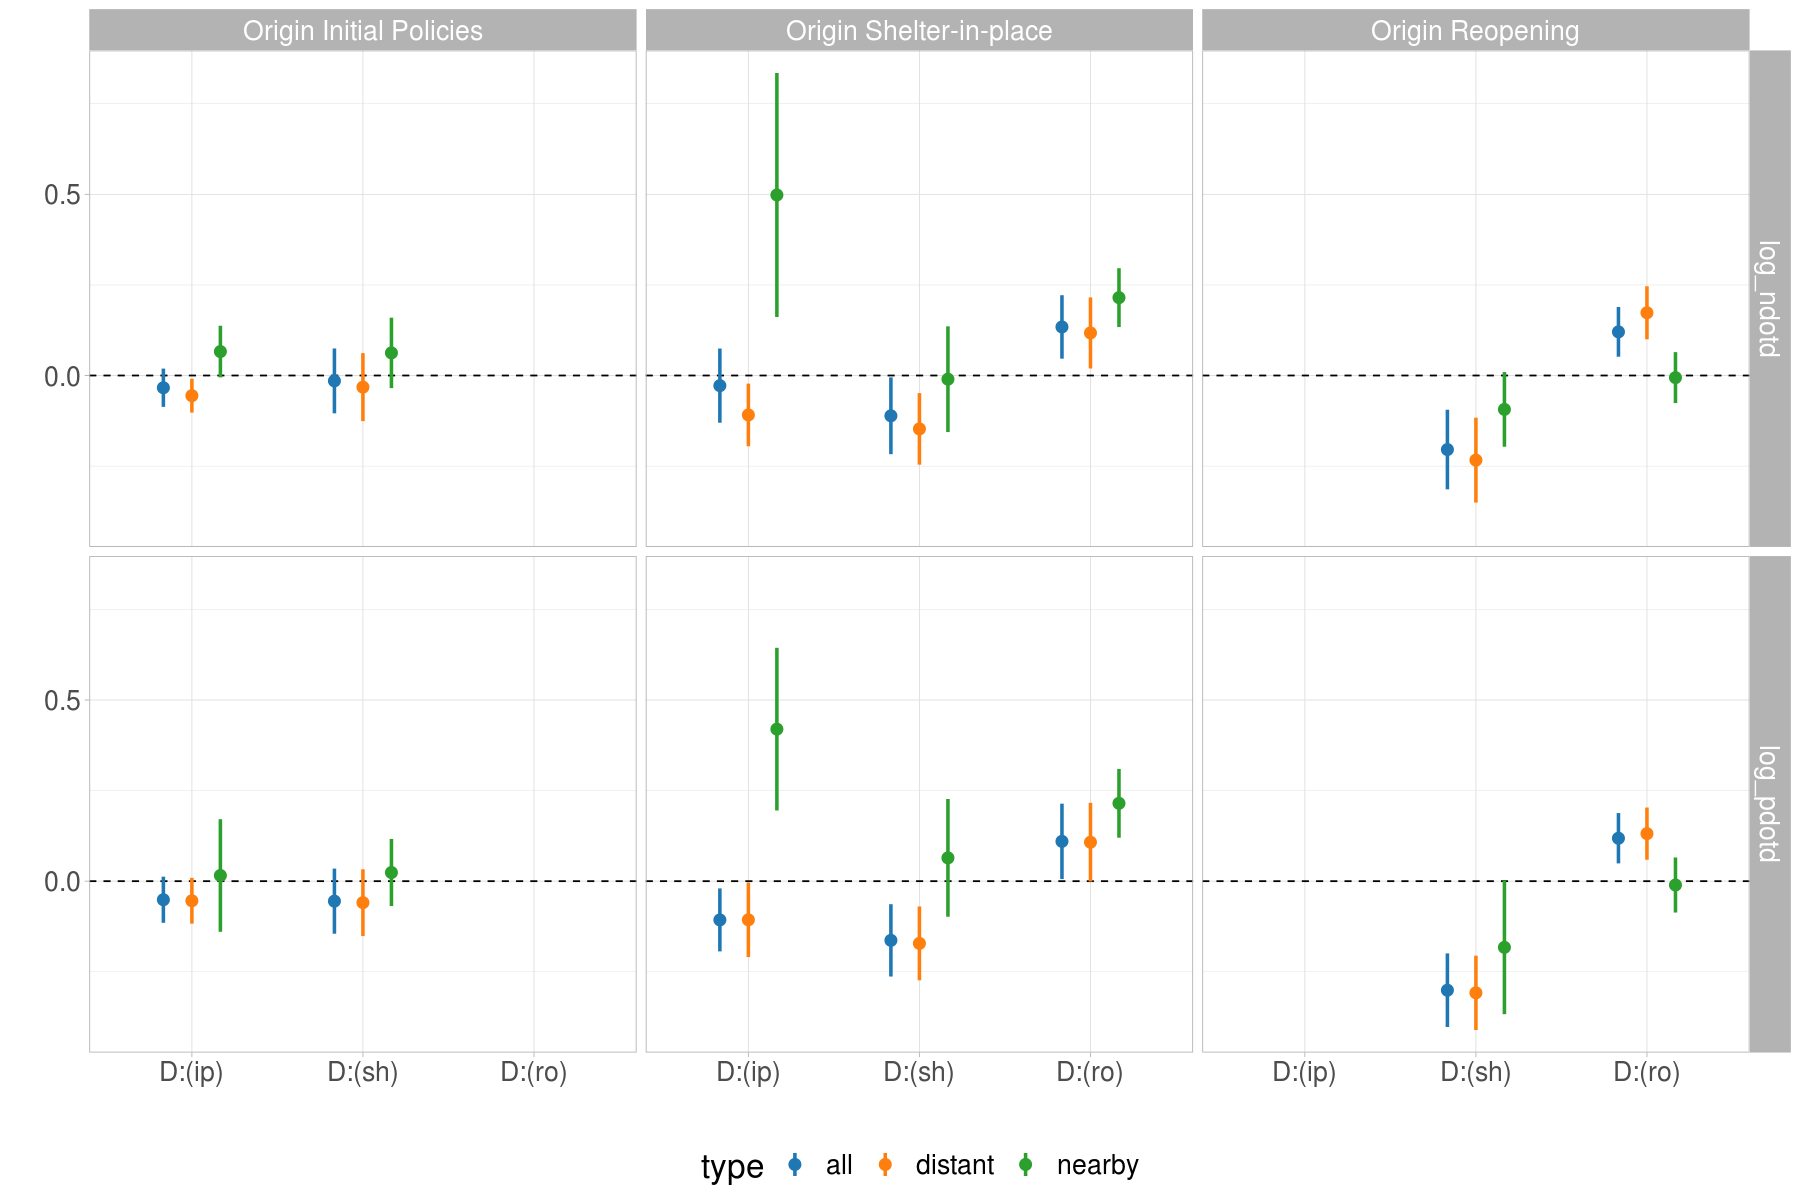

In [52]:
pn <- c('op1'   = "Origin Initial Policies",
        'op2'   = "Origin Shelter-in-place",
        'op3'   = "Origin Reopening",
        'ndotd' = 'log_ndotd',
        'pdotd' = 'log_pdotd')

as.data.frame(summary(fit9)$coef) %>%
    mutate(var = rownames(.)) %>%
    filter(!is.na(Estimate)) %>%
    mutate(var  = ifelse(var == 'op3_dp0', 'op3_dp1', var),
           dv   = 'ndotd',
           type = ifelse(str_detect(var, '_nc$'), 'distant', 'nearby'),
           var  = str_replace(var, '_n?c', '')) %>%
    bind_rows(as.data.frame(summary(fit10)$coef) %>%
              mutate(var = rownames(.)) %>%
              filter(!is.na(Estimate)) %>%
              mutate(var  = ifelse(var == 'op3_dp0', 'op3_dp1', var),
                     dv   = 'pdotd',
                     type = ifelse(str_detect(var, '_nc$'), 'distant', 'nearby'),
                     var  = str_replace(var, '_n?c', '')),
              as.data.frame(summary(fit7)$coef) %>%
              mutate(var = rownames(.)) %>%
              filter(!is.na(Estimate)) %>%
              mutate(var  = ifelse(var == 'op3_dp0', 'op3_dp1', var),
                     dv   = 'ndotd', 
                     type = 'all'), 
              as.data.frame(summary(fit8)$coef) %>%
              mutate(var = rownames(.)) %>%
              filter(!is.na(Estimate)) %>%
              mutate(var  = ifelse(var == 'op3_dp0', 'op3_dp1', var),
                     dv   = 'pdotd',
                     type = 'all')) %>%
    filter(!str_detect(var, 'Rain'), !str_detect(var, 'TMAX')) %>%
    separate(var, into = c('origin policy', 'destination policy')) %>%
    left_join(ics) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    filter(!is.na(`destination policy`), `origin policy` != 'op0', `destination policy` != 'dp0') %>%
    mutate(`destination policy` = ifelse(str_detect(`destination policy`, 'p1'), 'D:(ip)', 
                                        ifelse(str_detect(`destination policy`, 'p2'), 'D:(sh)', 'D:(ro)')),
           `destination policy` = factor(`destination policy`, levels = c('D:(ip)', 'D:(sh)', 'D:(ro)'))) -> temp

temp %>%
    filter(n > 4000) %>%
    ggplot(aes(x = `destination policy`, y = estimate, color = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    scale_color_d3() +
    xlab('') + 
    ylab('') +
    facet_grid(dv ~ `origin policy`, labeller = as_labeller(pn)) +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p

ggsave('/home/mfzhao/p4.pdf', p, device = 'pdf', width = 6.5, height = 5, scale = 2)

p

In [54]:
sum(ics$n)

[1] 6214936

In [56]:
4000/(6214936/2)

[1] 0.001287222

In [ ]:
as.data.frame(summary(fit7)$coef) %>%
    mutate(var = rownames(.)) %>%
    filter(!is.na(Estimate)) %>%
    mutate(var = ifelse(var == 'op3_dp0', 'op3_dp1', var),
           dv  = 'ndotd') %>%
    bind_rows(as.data.frame(summary(fit8)$coef) %>%
              mutate(var = rownames(.)) %>%
              filter(!is.na(Estimate)) %>%
              mutate(var = ifelse(var == 'op3_dp0', 'op3_dp1', var),
                     dv  = 'pdotd')) %>%
    filter(!str_detect(var, 'Rain'), !str_detect(var, 'TMAX')) %>%
    separate(var, into = c('origin policy', 'destination policy')) %>%
    rename(estimate = Estimate, se = `Cluster s.e.`) %>%
    filter(!is.na(`destination policy`), `origin policy` != 'op0') %>%
    ggplot(aes(x = `destination policy`, y = estimate)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    xlab('') + 
    ylab('') +
    facet_grid(dv ~ `origin policy`) +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom')

In [243]:
temp %>%
    mutate(impact = (exp(estimate) - 1) * 100) %>%
    filter(`origin policy`      == 'op3', 
           `destination policy` == 'D:(ro)')

estimate,se,t value,Pr(>|t|),origin policy,destination policy,dv,type,n,impact
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<int>,<dbl>
-0.00577751,0.03550385,-0.1627291,8.713876e-01,op3,D:(ro),ndotd,nearby,175627,-0.5760853
0.17317551,0.03700393,4.6799222,2.222326e-05,op3,D:(ro),ndotd,distant,617121,18.9074782
-0.01065029,0.03839293,-0.2774024,7.826149e-01,op3,D:(ro),pdotd,nearby,175627,-1.0593778
0.13117037,0.03639618,3.6039594,7.211945e-04,op3,D:(ro),pdotd,distant,617121,14.0162014
0.12047251,0.03463586,3.4782596,1.054736e-03,op3,D:(ro),ndotd,all,792748,12.8029725
0.11841760,0.03508354,3.3753036,1.432862e-03,op3,D:(ro),pdotd,all,792748,12.5714113


In [ ]:
fit1 <- felm(log(pdotd) ~ oRain1 + oRain2 + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op1 + op2 + op3 + dp1 + dp2 + dp3 + 
             op1:dp1 + op1:dp2 + op1:dp3 + 
             op2:dp1 + op2:dp2 + op2:dp3 + 
             op3:dp1 + op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit1)

In [ ]:
fit1 <- felm(log(ndotd) ~ oRain + dRain + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op2 + op3 + dp2 + dp3 +
             op2:dp2 + op2:dp3 + 
             op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df)
summary(fit1)

In [ ]:
fit1 <- felm(log(pdotd) ~ oRain + dRain + poly(oTMAX, 2) + poly(dTMAX, 2) +
             op2 + op3 + dp2 + dp3 +
             op2:dp2 + op2:dp3 + 
             op3:dp2 + op3:dp3
             | dyad + date | 0 | origin_cluster + destination_cluster, df, weights = df$n)
summary(fit1)

In [47]:
df %>%
    mutate(origin = str_sub(dyad, 1, 5)) %>%
    select(origin, n) %>%
    distinct() %>%
    arrange(n) %>%
    summarize(sum(n))

sum(n)
<int>
298896648
